In [54]:
#by Rafael Reis | https://github.com/faelreis

In [55]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
#Coleta de Dados
url = "https://www.reclameaqui.com.br/empresa/imobibrasil/lista-reclamacoes/"
header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36"}
response = requests.get(url, headers=header)
soup = BeautifulSoup(response.content, "html.parser")
#Adicione o tipo do elemento HTML(h1, h2, p, span, strong) e sua respectiva classe
reviews = soup.find_all("p", class_="jmCUqY")


In [57]:
#Limpeza
cleaned_reviews = [review.get_text().strip() for review in reviews]

In [58]:
#Vetorização
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)

In [59]:
#Agrupamento (K-Means)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_

In [60]:
#Palavras-Chave e Contagem
cluster_keywords = {}
terms = tfidf_vectorizer.get_feature_names_out()  # Obter os termos (palavras)
for cluster_id in range(num_clusters):
    cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
    cluster_tfidf_scores = tfidf_matrix[cluster_indices].mean(axis=0).A1  # Média do TF-IDF por cluster
    sorted_indices = cluster_tfidf_scores.argsort()[::-1]

    # Filtrar palavras-chave
    filtered_keywords = [terms[i] for i in sorted_indices if terms[i] not in stopwords.words("portuguese")]
    keywords = filtered_keywords[:10]

    # Contagem de palavras
    cluster_words = [terms[i] for i in sorted_indices if terms[i] not in stopwords.words("portuguese")]
    word_counts = Counter(cluster_words)

    cluster_keywords[cluster_id] = {"keywords": keywords, "word_counts": word_counts}

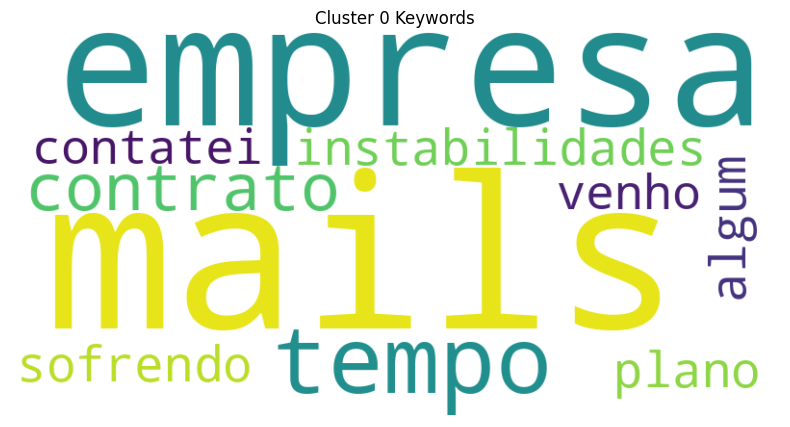

Cluster 0 Word Counts:
mails: 1
empresa: 1
tempo: 1
contrato: 1
instabilidades: 1
sofrendo: 1
plano: 1
algum: 1
contatei: 1
venho: 1
prestando: 1
bom: 1
olá: 1
hospedados: 1
vem: 1
serviço: 1
imobibrasil: 1
junto: 1
meses: 1
sistema: 1
site: 1
cá: 1
corretores: 1
entrei: 1
culpa: 1
editado: 1
dar: 1
deixam: 1
dois: 1
delespéssimo: 1
desde: 1
dia: 1
diferentes: 1
diversas: 1
dias: 1
whats: 1
contratei: 1
apresen: 1
22: 1
300: 1
39: 1
40: 1
90: 1
agora: 1
agosto: 1
alguns: 1
ambos: 1
anos: 1
apenas: 1
aqui: 1
contrate: 1
ate: 1
atendimento: 1
aumentei: 1
azul: 1
barrinha: 1
bem: 1
boleto: 1
brasil: 1
clientes: 1
consta: 1
contato: 1
colegas: 1
infelizmente: 1
sempre: 1
provedor: 1
péssimo: 1
quan: 1
reais: 1
real: 1
reativar: 1
reclame: 1
ruins: 1
sendo: 1
porem: 1
servi: 1
servidor: 1
super: 1
superando: 1
trabalhamos: 1
usuário: 1
vezes: 1
prestou: 1
fica: 1
fid: 1
forcece: 1
horrível: 1
horários: 1
imobi: 1
imobiliario: 1
imobiliárias: 1
inacessíve: 1
viva: 1
inicio: 1
instável: 1
mes

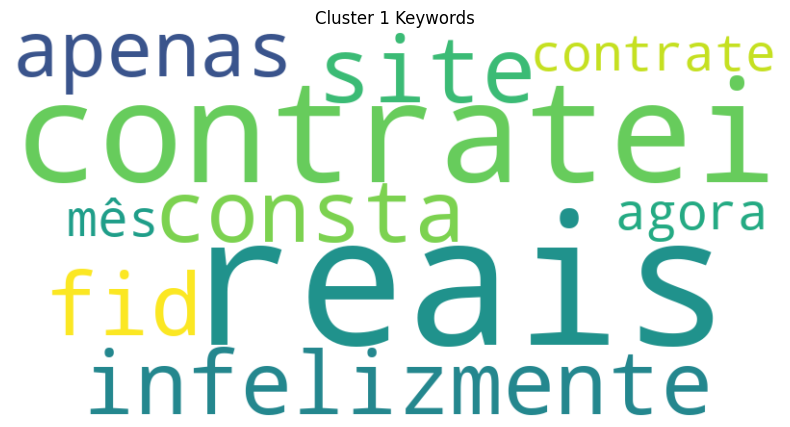

Cluster 1 Word Counts:
reais: 1
contratei: 1
site: 1
infelizmente: 1
consta: 1
fid: 1
apenas: 1
contrate: 1
mês: 1
agora: 1
90: 1
inicio: 1
39: 1
bem: 1
pago: 1
mes: 1
viva: 1
imobiliario: 1
real: 1
forcece: 1
40: 1
servi: 1
300: 1
ambos: 1
junto: 1
imobi: 1
brasil: 1
imobibrasil: 1
dois: 1
diversas: 1
agosto: 1
editado: 1
diferentes: 1
azul: 1
empresa: 1
entrei: 1
dias: 1
22: 1
fica: 1
algum: 1
delespéssimo: 1
dia: 1
desde: 1
aumentei: 1
boleto: 1
bom: 1
atendimento: 1
ate: 1
clientes: 1
colegas: 1
aqui: 1
apresen: 1
contato: 1
anos: 1
contrato: 1
corretores: 1
alguns: 1
culpa: 1
cá: 1
dar: 1
deixam: 1
barrinha: 1
contatei: 1
whats: 1
horrível: 1
provedor: 1
quan: 1
reativar: 1
reclame: 1
ruins: 1
sempre: 1
sendo: 1
servidor: 1
serviço: 1
sistema: 1
sofrendo: 1
super: 1
superando: 1
tempo: 1
trabalhamos: 1
usuário: 1
vem: 1
venho: 1
vezes: 1
péssimo: 1
prestou: 1
horários: 1
prestando: 1
hospedados: 1
imobiliárias: 1
inacessíve: 1
instabilidades: 1
instável: 1
mails: 1
meses: 1
minuto

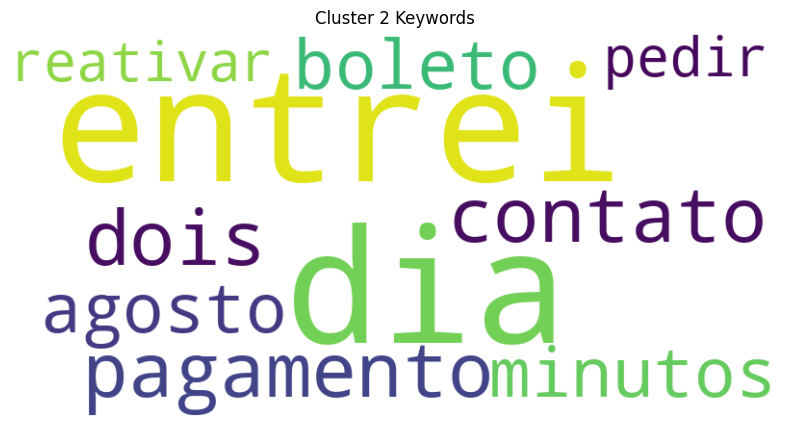

Cluster 2 Word Counts:
dia: 1
entrei: 1
pagamento: 1
contato: 1
dois: 1
minutos: 1
agosto: 1
boleto: 1
reativar: 1
pedir: 1
22: 1
aumentei: 1
ate: 1
ruins: 1
porem: 1
anos: 1
superando: 1
alguns: 1
trabalhamos: 1
cá: 1
prestou: 1
meses: 1
nunca: 1
imobibrasil: 1
sistema: 1
site: 1
dias: 1
empresa: 1
culpa: 1
deixam: 1
dar: 1
desde: 1
delespéssimo: 1
editado: 1
diversas: 1
corretores: 1
diferentes: 1
whats: 1
contrato: 1
aqui: 1
300: 1
39: 1
40: 1
90: 1
agora: 1
algum: 1
ambos: 1
apenas: 1
apresen: 1
atendimento: 1
contratei: 1
azul: 1
barrinha: 1
bem: 1
bom: 1
brasil: 1
clientes: 1
colegas: 1
fid: 1
consta: 1
contatei: 1
contrate: 1
fica: 1
infelizmente: 1
forcece: 1
serviço: 1
péssimo: 1
quan: 1
reais: 1
real: 1
reclame: 1
sempre: 1
sendo: 1
servi: 1
servidor: 1
horrível: 1
sofrendo: 1
super: 1
tempo: 1
usuário: 1
vem: 1
venho: 1
vezes: 1
provedor: 1
prestando: 1
plano: 1
horários: 1
hospedados: 1
imobi: 1
imobiliario: 1
imobiliárias: 1
inacessíve: 1
viva: 1
inicio: 1
instabilidades: 

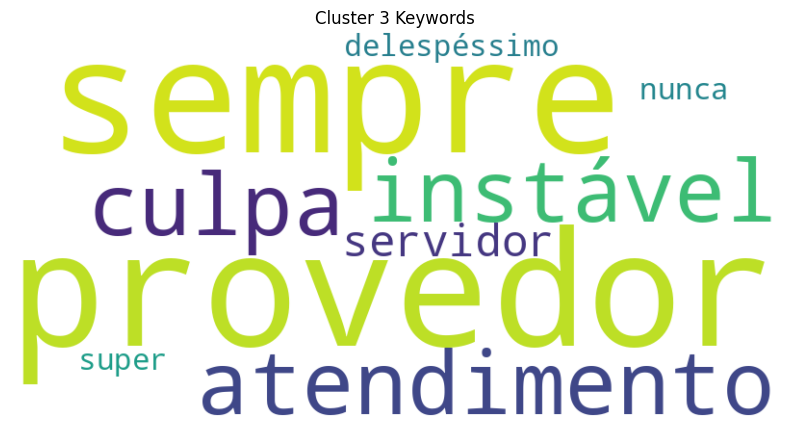

Cluster 3 Word Counts:
provedor: 1
sempre: 1
atendimento: 1
instável: 1
culpa: 1
servidor: 1
delespéssimo: 1
super: 1
nunca: 1
2016: 1
novembro: 1
sendo: 1
imobiliárias: 1
desde: 1
corretores: 1
usuário: 1
apresen: 1
horrível: 1
quan: 1
deixam: 1
dar: 1
clientes: 1
barrinha: 1
azul: 1
perdido: 1
péssimo: 1
whats: 1
brasil: 1
imobi: 1
sistema: 1
site: 1
40: 1
22: 1
consta: 1
contatei: 1
contato: 1
contrate: 1
contratei: 1
contrato: 1
trabalhamos: 1
cá: 1
tempo: 1
superando: 1
sofrendo: 1
dia: 1
dias: 1
diferentes: 1
diversas: 1
dois: 1
300: 1
colegas: 1
90: 1
agora: 1
agosto: 1
algum: 1
alguns: 1
ambos: 1
anos: 1
apenas: 1
vezes: 1
aqui: 1
ate: 1
venho: 1
aumentei: 1
39: 1
vem: 1
bem: 1
boleto: 1
bom: 1
editado: 1
entrei: 1
servi: 1
mês: 1
olá: 1
pagamento: 1
pago: 1
ruins: 1
pedir: 1
reclame: 1
plano: 1
porem: 1
prestando: 1
prestou: 1
reativar: 1
real: 1
reais: 1
minutos: 1
meses: 1
empresa: 1
mes: 1
fica: 1
fid: 1
forcece: 1
horários: 1
hospedados: 1
imobibrasil: 1
imobiliario: 1
ina

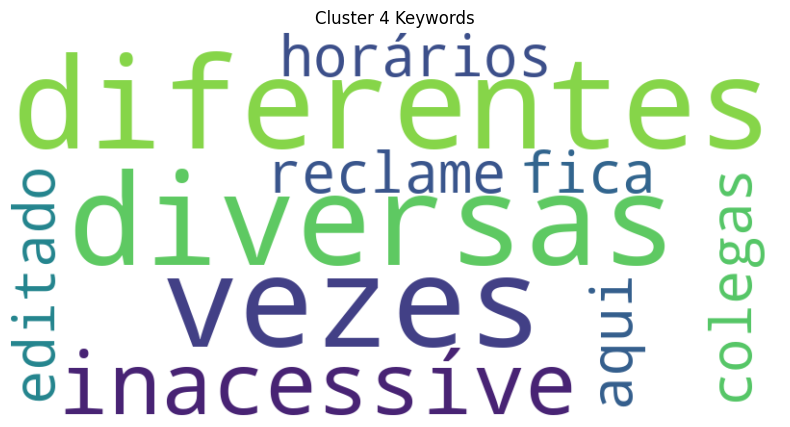

Cluster 4 Word Counts:
diferentes: 1
vezes: 1
diversas: 1
inacessíve: 1
horários: 1
editado: 1
aqui: 1
fica: 1
colegas: 1
reclame: 1
dias: 1
sistema: 1
site: 1
desde: 1
delespéssimo: 1
dar: 1
cá: 1
culpa: 1
dia: 1
corretores: 1
deixam: 1
whats: 1
dois: 1
empresa: 1
entrei: 1
fid: 1
forcece: 1
horrível: 1
hospedados: 1
contrato: 1
contatei: 1
contratei: 1
contrate: 1
22: 1
300: 1
39: 1
40: 1
90: 1
agora: 1
agosto: 1
algum: 1
alguns: 1
ambos: 1
anos: 1
apenas: 1
apresen: 1
ate: 1
atendimento: 1
aumentei: 1
azul: 1
barrinha: 1
bem: 1
boleto: 1
bom: 1
brasil: 1
clientes: 1
consta: 1
imobibrasil: 1
contato: 1
imobi: 1
infelizmente: 1
imobiliario: 1
servidor: 1
quan: 1
reais: 1
real: 1
reativar: 1
ruins: 1
sempre: 1
sendo: 1
servi: 1
serviço: 1
provedor: 1
sofrendo: 1
super: 1
superando: 1
tempo: 1
trabalhamos: 1
usuário: 1
vem: 1
venho: 1
péssimo: 1
prestou: 1
imobiliárias: 1
mês: 1
viva: 1
inicio: 1
instabilidades: 1
instável: 1
junto: 1
mails: 1
mes: 1
meses: 1
minutos: 1
prestando: 1
nov

In [61]:
#Visualizações (Word Clouds) e Impressão da Contagem
for cluster_id, data in cluster_keywords.items():
    keywords = data["keywords"]
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster_id} Keywords")
    plt.show()

    print(f"Cluster {cluster_id} Word Counts:")
    for word, count in data["word_counts"].items():
        print(f"{word}: {count}")
    print("-" * 20)

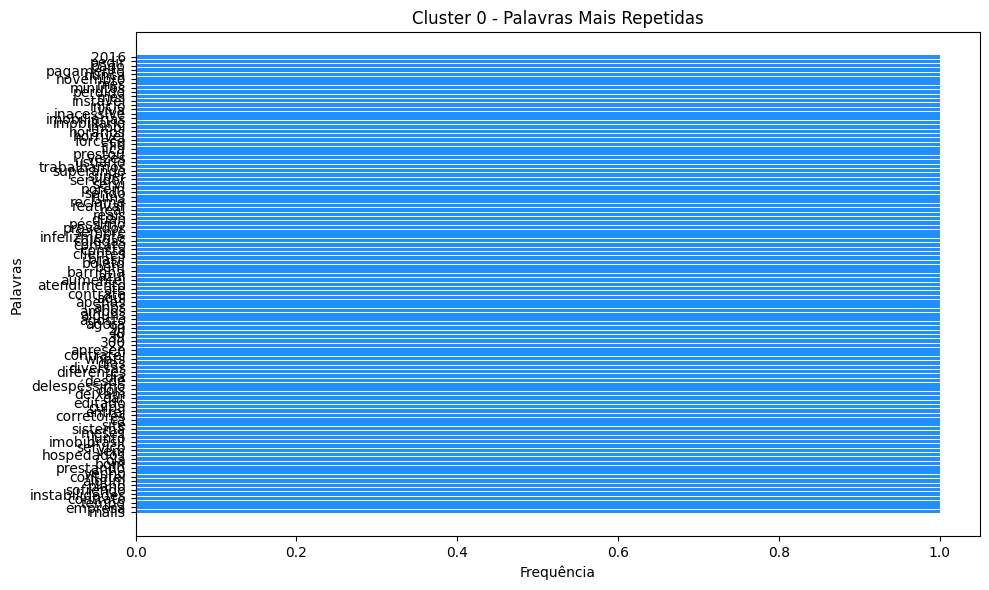

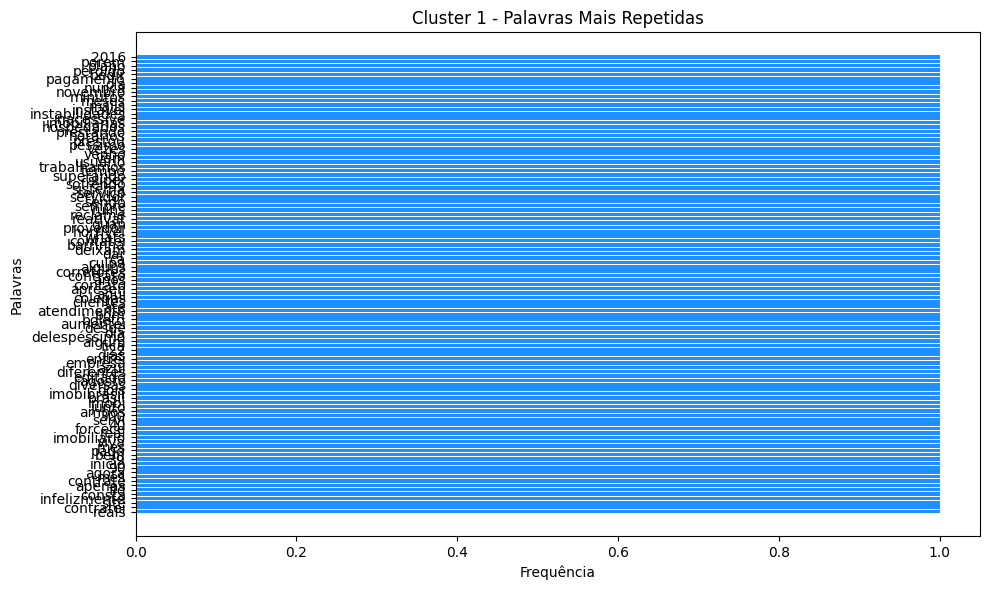

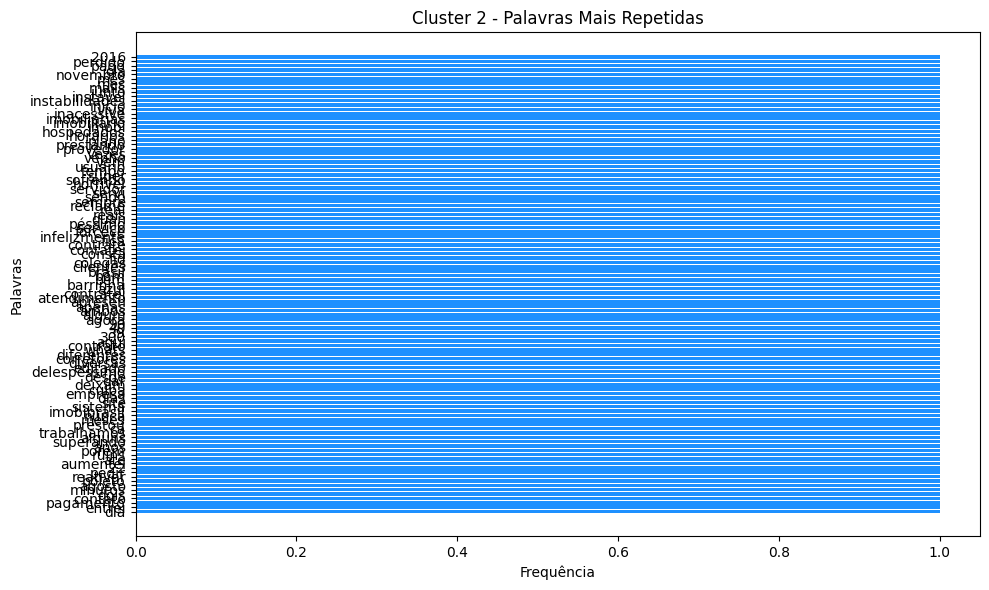

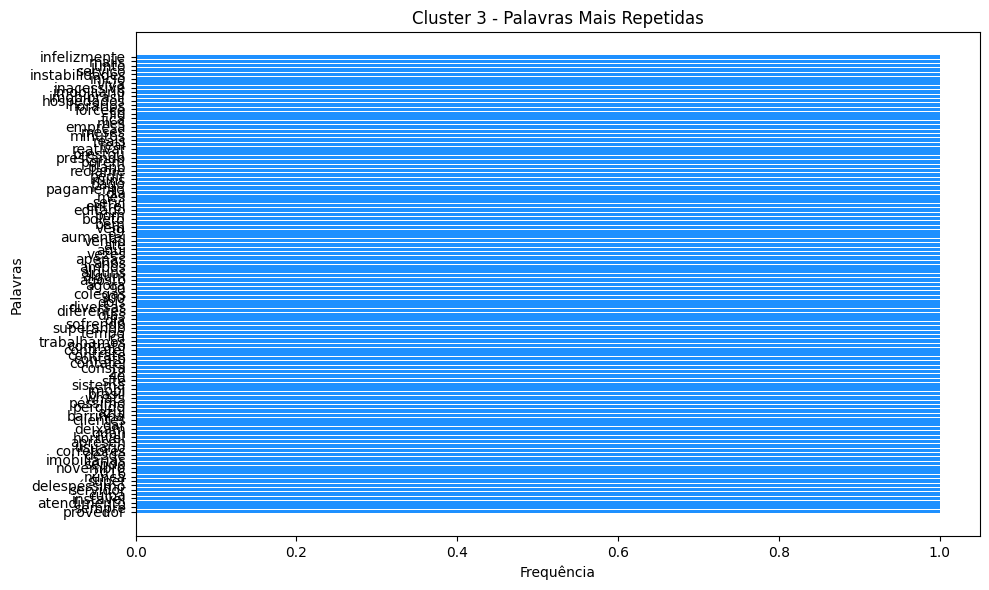

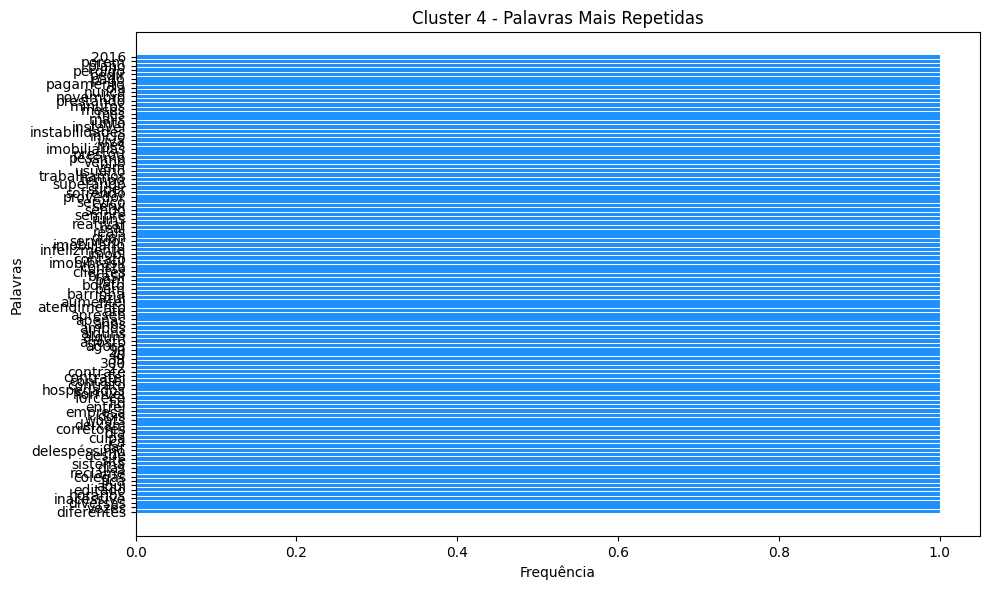

In [62]:
#Gráficos de Barras
for cluster_id, data in cluster_keywords.items():
    keywords = data["keywords"]
    word_counts = data["word_counts"]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(word_counts)), list(word_counts.values()), color='dodgerblue')
    plt.yticks(range(len(word_counts)), list(word_counts.keys()))
    plt.xlabel("Frequência")
    plt.ylabel("Palavras")
    plt.title(f"Cluster {cluster_id} - Palavras Mais Repetidas")
    plt.tight_layout()
    plt.show()